# Laboratorio 3: Detección de movimiento y tracking

**Parte 1:** Detección de movimiento con diferencia de frames y modelo de fondo 

1.

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
def frame_differencing(im1, im2, th= 30):
    
    return (((im2-im1) > th).astype(int)) * 255

In [3]:
im1 = cv2.imread('seq4/seq1/image-0001.jpg',0)
im2 = cv2.imread('seq4/seq1/image-0002.jpg',0)

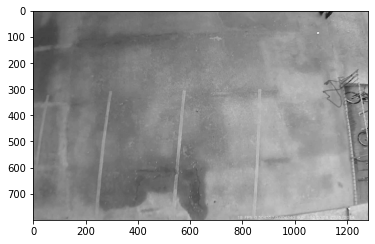

In [5]:
plt.imshow(im1, cmap = 'gray')

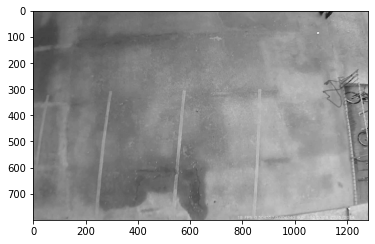

In [6]:
plt.imshow(im1, cmap = 'gray')

In [7]:
r = frame_differencing(im1,im2, 50)

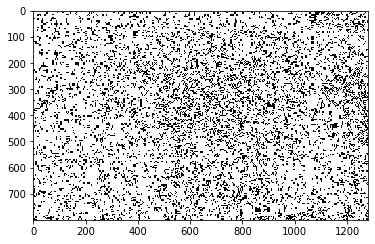

In [8]:
plt.imshow(r, cmap = 'Greys',interpolation='nearest')

In [4]:
from os import scandir
import numpy as np
def detector(seq, th, method = frame_differencing):
    directory = 'seq4/' + seq + '/'
    ims_names = [im.name for im in scandir(directory)] #se listan los nombres de las imagenes del directorio
    ims_names = sorted(ims_names) #se ordenan alfabeticamente
    frame_width = 1280
    frame_height = 800
    out = cv2.VideoWriter('outpy.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, 
                          (frame_width,frame_height),
                          isColor = False)

    #dif = []
    
    
    for j, im in enumerate(ims_names[:-1]):
        im1 = cv2.imread(directory + im,0)
        im2 = cv2.imread(directory + ims_names[j+1],0)
        #dif.append(method(im1, im2))
        r = method(im1, im2, th)
        out.write(np.uint8(r))
        
    out.release()



In [37]:
detector('seq1', th=25)

2.

In [5]:
class averaging_background:
    
    def __init__(self, alpha):
        self.alpha = alpha
        
    def fit(self, background_images):
        self.X = background_images.mean(axis = 0)
        self.D = 1 + background_images.std(axis = 0)
        
    def differencing(self,im):
        out1 = (im < self.X - self.alpha * self.D).astype(int) * 255
        out2 = (im > self.X + self.alpha * self.D).astype(int) * 255
        return out1 + out2

In [6]:
from os import scandir
import numpy as np
directory = 'seq4/fondo/'
ims_names = [im.name for im in scandir(directory)] #se listan los nombres de las imagenes del directorio
ims_names = sorted(ims_names) #se ordenan alfabeticamente

fondo = []
for im in ims_names:
    im1 = cv2.imread(directory + im,0)
    fondo.append(im1)
fondo = np.asarray(fondo)

In [8]:
avg_background = averaging_background(20)
avg_background.fit(fondo)

In [9]:
frame_width = 1280
frame_height = 800

out = cv2.VideoWriter('avg_diff_seq1.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 25, 
                      (frame_width,frame_height),
                      isColor = False)

directory = 'seq4/seq1/'
ims_names = [im.name for im in scandir(directory)] #se listan los nombres de las imagenes del directorio
ims_names = sorted(ims_names) #se ordenan alfabeticamente

for im in ims_names:
    im1 = cv2.imread(directory + im,0)
    r = avg_background.differencing(im1)
    out.write(np.uint8(r))

out.release()

3.

In [72]:
frame_width = 1280
frame_height = 800
threshold_h = frame_width * 3
threshold_v = frame_height * 3

out = cv2.VideoWriter('avg_bb_seq1.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 25, 
                      (frame_width,frame_height),
                      isColor = True)

directory = 'seq4/seq1/'
ims_names = [im.name for im in scandir(directory)] #se listan los nombres de las imagenes del directorio
ims_names = sorted(ims_names) #se ordenan alfabeticamente

for im in ims_names:
    im_color = cv2.imread(directory + im)
    im1 = cv2.cvtColor(im_color, cv2.COLOR_BGR2GRAY)

    r = avg_background.differencing(im1)
    c = r.sum(axis = 0) # suma de columnas
    f = r.sum(axis = 1) #suma de filas
    color = (255, 0, 0) 
    thickness = 2

    try:
        c = list(c > threshold_h)
        f = list(f > threshold_v)
        
        x_1 = c.index(True)
        c.reverse()
        x_2 = frame_width - c.index(True)
        y_1 = f.index(True)
        f.reverse()
        y_2 = frame_height - f.index(True)
        im_color = cv2.rectangle(im_color, (x_1, y_1), (x_2, y_2), color, thickness) 
    except:
        pass
    out.write(im_color)

out.release()

